<h2>
<b>
Namų darbas nr.1
</b>

</b><b>

<b>Tema:</b> daugialypė tiesinė regresija
</h2>


Atliko: Ignas Tamošiūnas DGTfm-23


<h2><b>Užduotis</b></h2>

<b> Užduoties tikslas</b>: sudaryti daugialypės tiesinės regresijos modelį, skirtą nustatyti priklausomybę tarp pasirinktų nepriklausomų kintamųjų ir priklausomo kintamojo.


Tikslui pasiekti reikia atlikti šiuos uždavinius:

1) Sudaryti koreliacijų matricą, kurioje matytume visų kintamųjų (tiek nepriklausomų, tiek priklausomo) tiesinio ryšio stiprumą. Patikrinti kiekvieno koreliacijos koeficiento atveju hipotezę apie koreliacijos koeficiento lygybę nuliui naudojant komandą;
2) Nubrėžti sklaidos diagramas visoms nagrinėjamų kintamųjų poroms
3) Sudaryti daugialypės tiesinės regresijos modelį į kurį būtų įtraukti tie nepriklausomi kintamieji, su kuriais modelis tenkina visas prielaidas ir visus regresiniam modeliui keliamus reikalavimus.
4) Atlikti sudaryto modelio prielaidų ir regresiniam modeliui keliamų reikalavimų tikrinimą. Pateikti išvadas apie modelį.



### 1. Duomenys

<br>Duomenų rinkinys paimtas iš Wikipeidia puslapio (https://en.wikipedia.org/wiki/The_Economist_Democracy_Index), kurį sudaro šalių kiekybiniai kintamieji.

Atliekant regresinę analizę, siekiama sudaryti daugialypį tiesinės regresijos modelį, kurio tikslas pagal penkis nepriklausomus kintamuosius prognozuoti bendrąjį rezultatą.
Priklausomas kintamasis y – Overall score.

Nepriklausomi kintamieji: $x_1$ – Electoral process and pluralism; $x_2$ – Functioning of government; $x_3$ – Political participation; $x_4$ – Political culture; $x_5$ – Civil liberties. Lentelėje žemiau galima stebėti kintamuosius. </br>

In [2]:
import pandas as pd

df = pd.read_csv('./data.txt', sep=" ")
df_copy = df.copy()
df

,Rank,Overall score,Electoral processand pluralism,Functioning of government,Political participation,Political culture,Civil liberties
0,1,9.81,10.00,9.64,10.00,10.00,9.41
1,2,9.61,10.00,9.29,10.00,8.75,10.00
2,3,9.52,10.00,9.64,8.89,9.38,9.71
3,4,9.39,9.58,9.64,8.33,10.00,9.41
4,5,9.29,10.00,9.64,8.33,8.75,9.71
...,...,...,...,...,...,...,...
162,163,1.43,0.00,0.00,2.78,4.38,0.00
163,164,1.35,0.83,0.00,1.67,1.88,2.35
164,165,1.08,0.00,2.50,1.67,1.25,0.00
165,166,0.74,0.00,0.00,0.56,3.13,0.00


### 2. Koreliacinė analizė

Koreliacinė matrica parodo visų kintamųjų (tiek nepriklausomų, tiek priklausomo) tiesinio ryšio stiprumą

<Axes: >

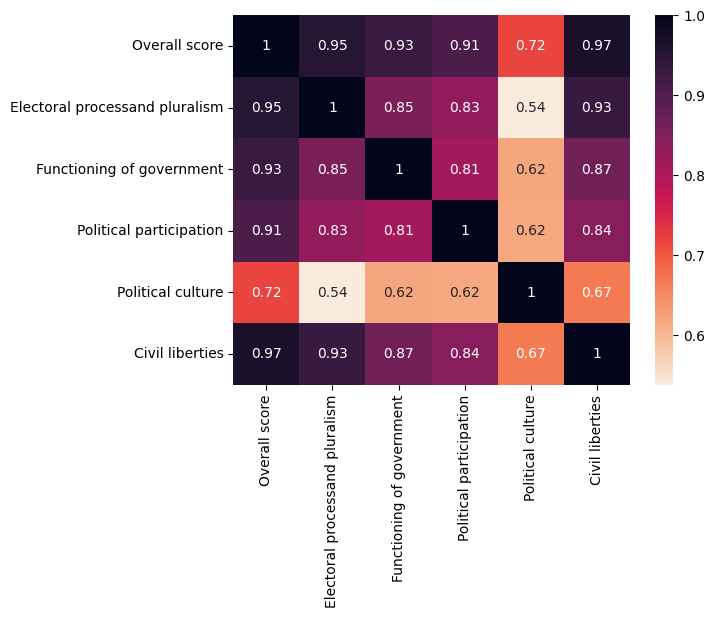

In [3]:
import seaborn as sns
import numpy as np

np.random.seed(20194281)
df = df.sample(n=50)

sns.heatmap(df.iloc[:, 1:].corr(),
annot=True,cmap="rocket_r")


#### Rezultatai:

1. Koreliacijos matrica parodė, kad Overall score turi stiprų ryšį su nepriklausomais kintamaisiais.

2. Pastebėjome jog priklausomasis kintamasis Overall score stipriai koreliuoja su: Civil liberties r = 0.97; Electoral process and pluralism r = 0.95; Functioning of government r = 0.93; Political participation r = 0.91 bei Political culture r = 0.72.

3. Stebint nepriklausomų kintamųjų koreliaciją pastebėta, kad tarpūsavyje labiausiai koreliuoja Electoral processand pluralisim su Civil liberties r = 0.93, Functioning of goverment su Civil liberties r = 0.87 ir Political participation su Civil liberties r = 0.84. Tai parodo multikolinearumą.



### 3. Sklaidos diagramos

Kintamųjų tiesinės priklausomybės stiprumą galima pamatyti iš sklaidos diagramos.

c:\Users\37062\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


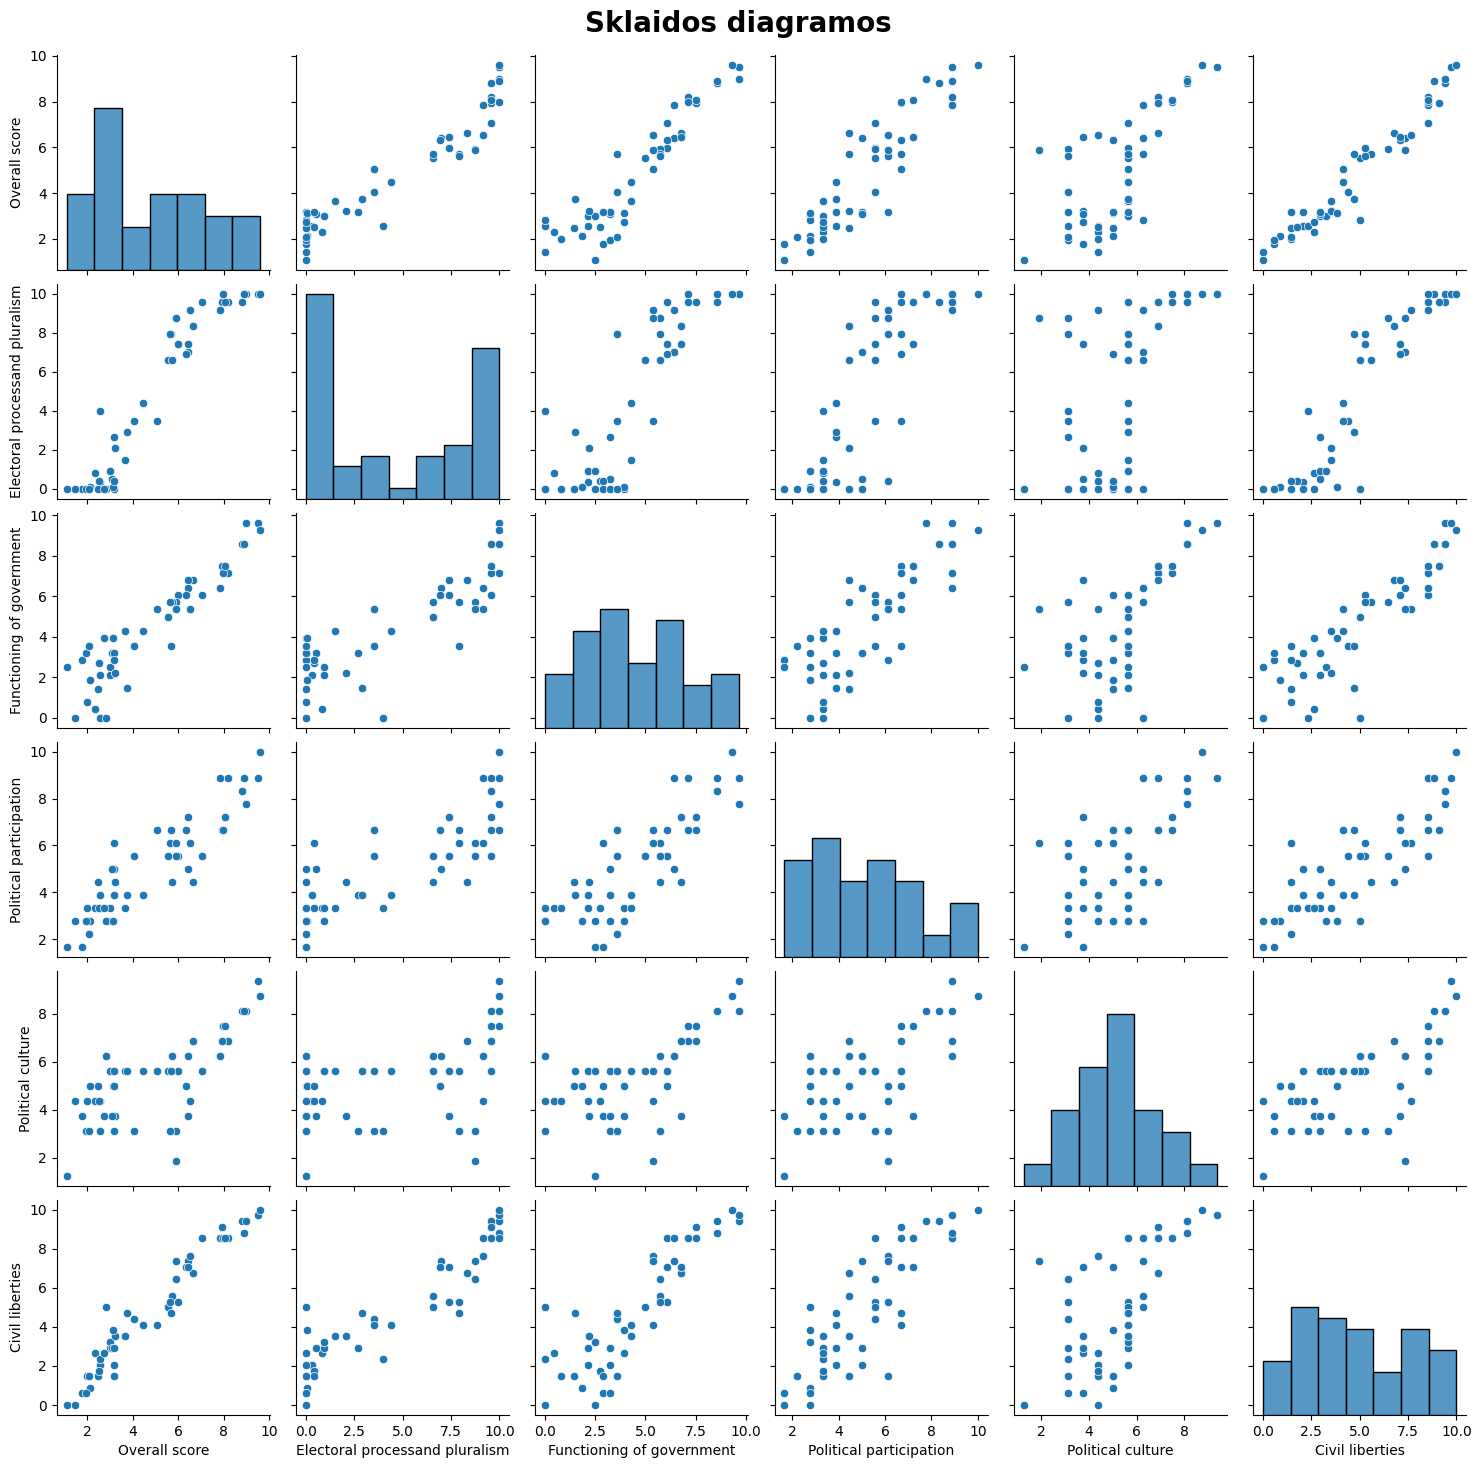

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df.iloc[:, 1:])
plt.suptitle('Sklaidos diagramos', fontsize=20, ha='center', fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.show()

### 4. Daugialypės tiesinės regresijos modelis

Sudaromas daugialypės tiesinės regresijos modelis, skirtas progrnuozuoti "Overall score" pagal nepriklausomus kintamuosius: "Electoral processand pluralism", "Functioning of government", "Political participation", "Political culture" ir "Civil liberties".

In [5]:
import statsmodels.api as sm

y = df['Overall score']
x = df.iloc[:, 2:]

const = sm.add_constant(x)

model = sm.OLS(y, const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Overall score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.244e+06
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          6.10e-129
Time:                        19:56:21   Log-Likelihood:                 224.85
No. Observations:                  50   AIC:                            -437.7
Df Residuals:                      44   BIC:                            -426.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

##### Rezultatai:
1. Regresijos modelio determinacijos koeficientas $ R^{2}_{\text{adj}} $ yra 1, tai reiškia, kad mūsų sudarytas regresijos modelis tobulai atitinka duomenis. Verta paminėti, kad toks aukštas determinacijos koeficientas gali parodyti ir per daug prisitaikiusį regresijos modelį bei modelio specifikacijų problemą.

2. Atlikus ANOVA testą gavome F-testo p-vertė $p < 0.05$, tai reiškia, kad bent vienas priklausomas kintamasis yra susijęs su nepriklausomu kintamuoju.

2. Pagal gautas p-reikšmes galima sakyti, kad regresoriai Electoral process and pluralism, functioning of government, political participation, political culture, civil liberties yra statistiškai reikšmingi overall score prognozavimui, nes gautos p-reikšmės yra $p < 0.05$.

Pažymėjus kintamuosius Overall score – $y$, Electoral process and pluralism – $x_1$, Functioning of government – $x_2$, Political participation – $x_3$, Political culture – $x_4$, Civil liberties – $x_5$ ir daugialypės tiesinės regresijos modelis bus aprašomas lygtimi:
$\hat{y} = -0.0015 + 0.2000x_1 + 0.1999x_2 + 0.1996x_3 + 0.2003x_4 + 0.2004x_5$

### 5.1 Multikolinearumo tikrinimas

Norint nustatyti ar kintamieji multikolinearūs ar ne, dažniausiai kiekvienam nepriklausomam kintamajam skaičiuojamas dispersijos mažėjimo daugiklis VIF (angl. Variance Inflation Factor).

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = const.columns

vif_data["VIF"] = [variance_inflation_factor(const.values, i)
                   for i in range(len(const.columns))]

print(vif_data)

                          feature        VIF
0                           const  13.432376
1  Electoral processand pluralism   9.625581
2       Functioning of government   4.761759
3         Political participation   4.040387
4               Political culture   2.144055
5                 Civil liberties  11.312979


##### Rezultatai:
Electoral processand pluralism, functioning of government, political participation, civil liberties VIF reikšmės yra didesnės už 4, todėl galima sakyti, kad šiame modelyje yra multikolinearumo problemos. Vadinasi tarp šio modelio nepriklausomų kintamųjų yra stipriai koreliuojančių.

### 5.2 Išskirčių analizė

Norėdami nustatyti ar duomenyse yra išskirčių skaičiuosime Kuko mato reikšmes $D_i$ kiekvienam stebėjimui. Išskirčių analizei yra braižoma Kuko mato diagrama.

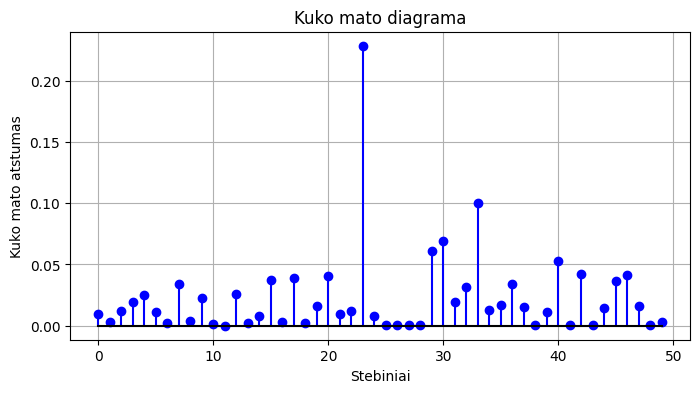

In [7]:
influence = results.get_influence()
cooks_distance = influence.cooks_distance[0]

plt.figure(figsize=(8, 4))
plt.stem(cooks_distance, linefmt='b-', markerfmt='bo', basefmt='k-')
plt.title("Kuko mato diagrama")
plt.xlabel("Stebiniai")
plt.ylabel("Kuko mato atstumas")
plt.grid(True)

plt.show()

##### Rezultatai:

Pagal Kuko mato diagramą, labiausiai išsiskiriantys stebiniai 24-tas, 30-tas, 31-tas ir 34-tas tačiau nėra pagrindo jų laikyti išskirtimis, nes D<sub>24</sub> < 1, D<sub>30</sub> < 1, D<sub>31</sub> < 1, ir D<sub>34</sub> < 1.





### 5.3 Liekamųjų paklaidų nepriklausomumas

Liekamųjų paklaidų nepriklausomumo tikrinimui taikomas Durbin-Watson kriterijų.

In [8]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson = durbin_watson(results.resid)

print(f'Durbin-Watson statistika: {round(durbin_watson, 2)}')


Durbin-Watson statistika: 1.65


##### Rezultatai:
Kriterijaus statistika yra artimesnė $2$, $d = 1.65$, kas parodo, kad autokoreliacijos liekamosiose paklaidose nėra.

### 5.4 Liekamųjų paklaidų normalumo tyrimas

Liekamųjų paklaidų normalumui tikrinti taikomas Kolmogorovo – Smirnovo testą.

Normalumui tirti brėžiama liekamųjų paklaidų histograma arba kvantilių grafikas $Q-Q$.

Kolmogorovo-Smirnovo testo statistika: 0.1
Kolmogorovo-Smirnovo testo p-vertė: 0.64


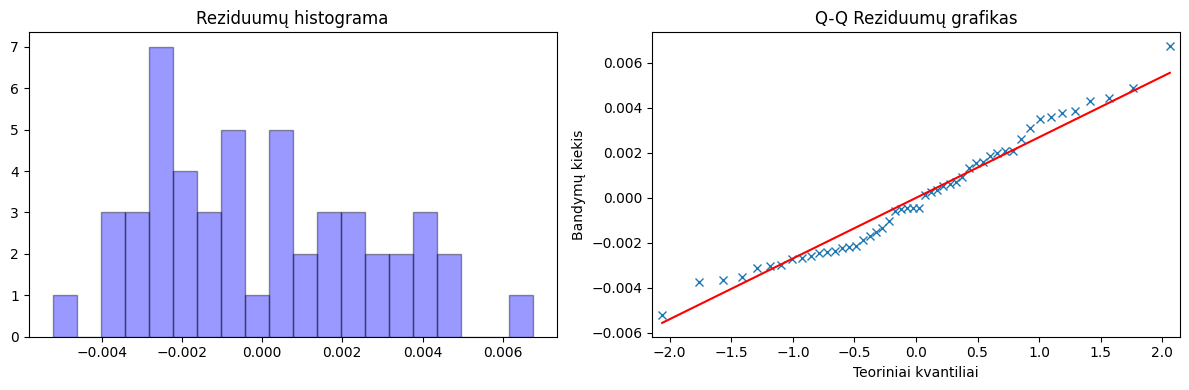

In [9]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kstest

residuals = results.resid
standardized_residuals = (residuals - residuals.mean()) / residuals.std()

ks_statistic, ks_p_value = kstest(standardized_residuals, 'norm')

print(f'Kolmogorovo-Smirnovo testo statistika: {round(ks_statistic, 2)}')
print(f'Kolmogorovo-Smirnovo testo p-vertė: {round(ks_p_value, 2)}')

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(residuals, bins=20, edgecolor='black', color='blue', alpha=0.4)
axs[0].set_title('Reziduumų histograma')

qqplot(residuals, line='s', ax=axs[1], marker='x')

axs[1].set_title('Q-Q Reziduumų grafikas')
axs[1].set_xlabel('Teoriniai kvantiliai')
axs[1].set_ylabel('Bandymų kiekis')

plt.tight_layout()
plt.show()

##### Rezultatai:
Gauti testo rezultatai rodo, kad liekamosios paklaidos tenkina normalumo sąlygą.

### 5.5. Tikrinama homoskedastiškumo problema

Homoskedastiškumui tikrinti brėžiama liekamųjų paklaidų arba standartizuotųjų liekanų diagrama. Jeigu šios liekanos išsibarstę tolygiai apie tiesę $y = 0$, galima sakyti, kad modelio liekamosios paklaidos tenkina homoskedastiškumo prielaidą.

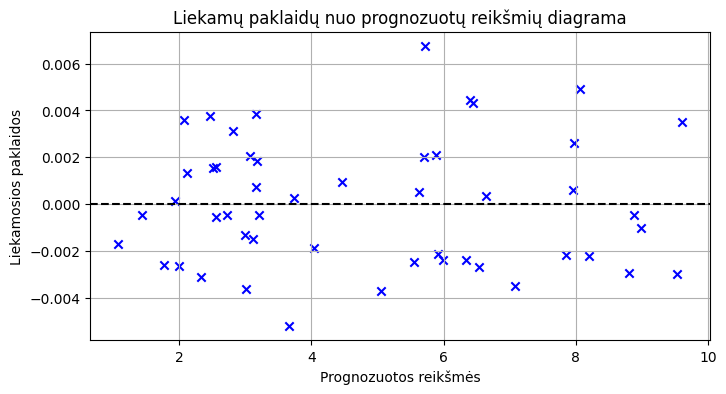

In [10]:
fitted_values = results.fittedvalues

plt.figure(figsize=(8, 4))

plt.scatter(results.fittedvalues, results.resid, marker='x', color='blue')
plt.axhline(y=0, color='k', linestyle='--')
plt.grid(True)
plt.title('Liekamų paklaidų nuo prognozuotų reikšmių diagrama')
plt.xlabel('Prognozuotos reikšmės')
plt.ylabel('Liekamosios paklaidos')
plt.show()

##### Rezultatai:
Modelio liekamosios paklaidos tenkina homoskedastiškumo prielaidą, nes liekanos išsibarstė tolygiai apie tiesę y = 0.

### Išvados


Regresinės analizės rodikliai:
- Koreguotas determinacijos koeficientas $ R^{2}_{\text{adj}} $ – 1
- ANOVA, F kriterijus – $7.244e+06$
- t testas – visos $p < 0,05$
- VIF – Ne visi $VIF_i ≤ 4$
- Kuko matas – Visi $D_i ≤ 1$
- Kolmogorovo-Smirnovo testas – $H_0$
- Homoskedastiškumo prielaida – tenkinama



Remiantis pateiktais rezultatais daromos išvados apie kiekvieno modelio tinkamumą duomenims:

1. Regresijos modelio determinacijos koeficientas $ R^{2}_{\text{adj}} $ yra 1, tai reiškia, kad mūsų sudarytas regresijos modelis tobulai atitinka duomenis. Verta paminėti, kad toks aukštas determinacijos koeficientas gali parodyti ir per daug prisitaikiusį regresijos modelį bei modelio specifikacijų problemą.
2. Atlikus ANOVA testą gavome F-testo p-vertė $p < 0.05$, tai reiškia, kad bent vienas priklausomas kintamasis yra susijęs su nepriklausomu kintamuoju.

3. Pagal gautas p-reikšmes galima sakyti, kad regresoriai Electoral process and pluralism, functioning of government, political participation, political culture, civil liberties yra statistiškai reikšmingi overall score prognozavimui, nes gautos p-reikšmės yra $p < 0.05$.

4. Electoral processand pluralism, functioning of government, political participation, civil liberties VIF reikšmės yra didesnės už 4, todėl galima sakyti, kad šiame modelyje yra multikolinearumo problemos. Vadinasi tarp šio modelio nepriklausomų kintamųjų yra stipriai koreliuojančių.

5. Pagal Kuko mato diagramą, labiausiai išsiskiriantys stebiniai 24-tas, 30-tas, 31-tas ir 34-tas tačiau nėra pagrindo jų laikyti išskirtimis, nes D<sub>24</sub> < 1, D<sub>30</sub> < 1, D<sub>31</sub> < 1, ir D<sub>34</sub> < 1.

6. Kolmogorovo-Smirnovo testas patvirtina nulinę hipotezę $H_0$, kas rodo, kad nėra pagrindo atmesti hipotezę apie duomenų normalumą.

7. Modelio liekamosios paklaidos tenkina homoskedastiškumo prielaidą, nes liekanos išsibarstė tolygiai apie tiesę $y = 0$.

Remiantis šiomis išvadomis galime teigti, kad sudarytas regresijos modelis yra tinkmas.